In [11]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [12]:
url = 'Dataset/'

In [ ]:
dataset_A = url + 'Dataset A.zip'
with ZipFile(dataset_A, 'r') as zip:
  zip.extractall()

In [13]:
PATH = 'Dataset/'
data_labels = pd.read_csv(PATH + 'training-c.csv', usecols = ['filename', 'digit'])
print(data_labels.shape)
data_labels.head()

(24298, 2)


,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7


In [10]:
data_labels.sort_values('digit')

,filename,digit
22806,c22806.png,0
7032,c07032.png,0
7031,c07031.png,0
2051,c02051.png,0
2052,c02052.png,0
...,...,...
12764,c12764.png,9
12780,c12780.png,9
22181,c22181.png,9
12721,c12721.png,9


In [4]:
# TRAIN_PATH = url + 'Train'
# os.mkdir(TRAIN_PATH)

# def processImages(folder_name):
#   src = PATH + folder_name + '/'
#   dir_folders = os.listdir(src)
#   for dir_name in dir_folders:
#     file_name = os.path.join(src, dir_name)
#     if os.path.isfile(file_name):
#       shutil.copy(file_name, TRAIN_PATH) 

# processImages('training-a')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Dataset/Train'

In [14]:
TRAIN_PATH = url + 'training-c'


In [15]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [16]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(data_labels, TRAIN_PATH, train_transform)
test_data = Dataset(data_labels, TRAIN_PATH, test_transform)

print("Trainig Samples: ", len(train_data))

Trainig Samples:  24298


# **Base Parameters**

In [15]:
batch_size = 300
num_iters = 20000
input_dim = 28*28
num_hidden = 250
output_dim = 10

learning_rate = 0.025

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

246


In [16]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:65
Test dataloader:17


In [17]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
#         self.softmax_1 = nn.Softmax(dim=1)
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.Softmax(dim=0)
#         self.softmax_2 = nn.Softmax(dim=1)
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
#         self.softmax_3 = nn.Softmax(dim=1)
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.Softmax(dim=0)
#         self.softmax_4 = nn.Softmax(dim=1)
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
#         self.softmax_5 = nn.Softmax(dim=1)
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()
        
#         self.linear_7 = nn.Linear(num_hidden, num_hidden)
#         self.relu_7 = nn.ReLU()
        
#         self.linear_8 = nn.Linear(num_hidden, num_hidden)
#         self.relu_8 = nn.ReLU()
        
#         self.linear_9 = nn.Linear(num_hidden, num_hidden)
#         self.relu_9 = nn.ReLU()

#         self.linear_10 = nn.Linear(num_hidden, num_hidden)
#         self.relu_10 = nn.ReLU()

        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
#         out  = self.linear_7(out)
#         out = self.relu_7(out)
        
#         out  = self.linear_8(out)
#         out = self.relu_8(out)
        
#         out  = self.linear_9(out)
#         out = self.relu_9(out)
        
#         out  = self.linear_10(out)
#         out = self.relu_10(out)
        
        probas  = self.linear_out(out)
        return probas

In [18]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=250, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=250, out_features=250, bias=True)
  (relu_2): Softmax(dim=0)
  (linear_3): Linear(in_features=250, out_features=250, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=250, out_features=250, bias=True)
  (relu_4): Softmax(dim=0)
  (linear_5): Linear(in_features=250, out_features=250, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=250, out_features=250, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=250, out_features=10, bias=True)
)

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)

In [20]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 10 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 10. Loss: 2.30826473236084. Accuracy: 10.310763531590862
Iteration: 20. Loss: 2.244840621948242. Accuracy: 16.443712698086024
Iteration: 30. Loss: 2.2106845378875732. Accuracy: 18.41942786581601
Iteration: 40. Loss: 2.1182785034179688. Accuracy: 17.657954311586746
Iteration: 50. Loss: 2.1779582500457764. Accuracy: 21.485902449063595
Iteration: 60. Loss: 2.0394411087036133. Accuracy: 22.720724428894833
Epoch:  2
Iteration: 70. Loss: 2.061147451400757. Accuracy: 21.506482815394115
Iteration: 80. Loss: 1.9856890439987183. Accuracy: 24.140769705700762
Iteration: 90. Loss: 1.9853800535202026. Accuracy: 24.94340399259107
Iteration: 100. Loss: 1.9546911716461182. Accuracy: 26.589833299032723
Iteration: 110. Loss: 1.9448705911636353. Accuracy: 26.589833299032723
Iteration: 120. Loss: 1.9281504154205322. Accuracy: 25.890100843795018
Iteration: 130. Loss: 2.032702684402466. Accuracy: 27.41304795225355
Epoch:  3
Iteration: 140. Loss: 1.9785231351852417. Accuracy: 27.968717843

Iteration: 1160. Loss: 1.0498371124267578. Accuracy: 53.097345132743364
Iteration: 1170. Loss: 1.3407237529754639. Accuracy: 51.101049598682856
Epoch:  19
Iteration: 1180. Loss: 1.105887532234192. Accuracy: 53.57069355834534
Iteration: 1190. Loss: 1.2448062896728516. Accuracy: 52.80922000411607
Iteration: 1200. Loss: 1.0287193059921265. Accuracy: 53.01502366742128
Iteration: 1210. Loss: 1.0909217596054077. Accuracy: 52.76805927145503
Iteration: 1220. Loss: 1.0963412523269653. Accuracy: 54.023461617616796
Iteration: 1230. Loss: 1.2172634601593018. Accuracy: 52.80922000411607
Epoch:  20
Iteration: 1240. Loss: 1.202816367149353. Accuracy: 53.71475612265898
Iteration: 1250. Loss: 1.0580251216888428. Accuracy: 53.797077587981065
Iteration: 1260. Loss: 0.9970459938049316. Accuracy: 53.89997941963367
Iteration: 1270. Loss: 1.138404369354248. Accuracy: 54.023461617616796
Iteration: 1280. Loss: 1.1031495332717896. Accuracy: 54.558551142210334
Iteration: 1290. Loss: 1.0713876485824585. Accuracy:

Iteration: 2290. Loss: 0.8574457764625549. Accuracy: 59.93002675447623
Iteration: 2300. Loss: 0.9512265920639038. Accuracy: 60.7944021403581
Iteration: 2310. Loss: 0.9305089116096497. Accuracy: 60.773821774027574
Iteration: 2320. Loss: 0.8203861713409424. Accuracy: 61.000205803663306
Iteration: 2330. Loss: 0.9781204462051392. Accuracy: 60.46511627906977
Iteration: 2340. Loss: 1.242319107055664. Accuracy: 59.80654455649311
Epoch:  37
Iteration: 2350. Loss: 0.8498420715332031. Accuracy: 61.51471496192632
Iteration: 2360. Loss: 0.8395586609840393. Accuracy: 60.71208067503601
Iteration: 2370. Loss: 0.9109242558479309. Accuracy: 61.28833093229059
Iteration: 2380. Loss: 0.7822128534317017. Accuracy: 60.60917884338341
Iteration: 2390. Loss: 0.9297908544540405. Accuracy: 61.20600946696851
Iteration: 2400. Loss: 0.8617746829986572. Accuracy: 60.753241407697054
Epoch:  38
Iteration: 2410. Loss: 0.8219089508056641. Accuracy: 61.72051862523153
Iteration: 2420. Loss: 0.8363009691238403. Accuracy: 6

Iteration: 3420. Loss: 0.7757675647735596. Accuracy: 64.25190368388557
Iteration: 3430. Loss: 0.7721464037895203. Accuracy: 64.08726075324141
Iteration: 3440. Loss: 0.8113781213760376. Accuracy: 63.86087672360568
Epoch:  54
Iteration: 3450. Loss: 0.6986600160598755. Accuracy: 64.25190368388557
Iteration: 3460. Loss: 0.7259736657142639. Accuracy: 65.0751183371064
Iteration: 3470. Loss: 0.7041202187538147. Accuracy: 64.72525210948754
Iteration: 3480. Loss: 0.6629340052604675. Accuracy: 64.62235027783494
Iteration: 3490. Loss: 0.73895263671875. Accuracy: 64.45770734719078
Iteration: 3500. Loss: 0.7179149985313416. Accuracy: 64.2724840502161
Iteration: 3510. Loss: 1.0695699453353882. Accuracy: 63.14056390203746
Epoch:  55
Iteration: 3520. Loss: 0.6817556023597717. Accuracy: 64.99279687178432
Iteration: 3530. Loss: 0.7962680459022522. Accuracy: 64.00493928791933
Iteration: 3540. Loss: 0.7685311436653137. Accuracy: 65.05453797077588
Iteration: 3550. Loss: 0.7100496292114258. Accuracy: 65.013

Iteration: 4560. Loss: 0.6123785972595215. Accuracy: 66.5774850792344
Iteration: 4570. Loss: 0.7458011507987976. Accuracy: 66.30994031693764
Iteration: 4580. Loss: 0.7089620232582092. Accuracy: 66.4745832475818
Iteration: 4590. Loss: 0.7214362621307373. Accuracy: 66.24819921794608
Iteration: 4600. Loss: 0.5956353545188904. Accuracy: 66.43342251492076
Iteration: 4610. Loss: 0.708264946937561. Accuracy: 66.72154764354805
Epoch:  72
Iteration: 4620. Loss: 0.6533766388893127. Accuracy: 66.96851203951431
Iteration: 4630. Loss: 0.644101619720459. Accuracy: 67.21547643548055
Iteration: 4640. Loss: 0.6918818950653076. Accuracy: 67.29779790080264
Iteration: 4650. Loss: 0.6818993091583252. Accuracy: 67.00967277217535
Iteration: 4660. Loss: 0.5992242693901062. Accuracy: 67.05083350483639
Iteration: 4670. Loss: 0.6209002733230591. Accuracy: 66.39226178225972
Iteration: 4680. Loss: 0.860144853591919. Accuracy: 66.35110104959868
Epoch:  73
Iteration: 4690. Loss: 0.639574408531189. Accuracy: 67.58592

Iteration: 5700. Loss: 0.6910758018493652. Accuracy: 67.62708376209096
Iteration: 5710. Loss: 0.6731971502304077. Accuracy: 68.71784317760856
Iteration: 5720. Loss: 0.8943735957145691. Accuracy: 66.78328874253961
Epoch:  89
Iteration: 5730. Loss: 0.5936828851699829. Accuracy: 68.42971804898127
Iteration: 5740. Loss: 0.6465256214141846. Accuracy: 68.47087878164231
Iteration: 5750. Loss: 0.5455852746963501. Accuracy: 67.38011936612472
Iteration: 5760. Loss: 0.5933559536933899. Accuracy: 67.68882486108252
Iteration: 5770. Loss: 0.644838809967041. Accuracy: 67.62708376209096
Iteration: 5780. Loss: 0.649417519569397. Accuracy: 68.34739658365919
Epoch:  90
Iteration: 5790. Loss: 0.5570467114448547. Accuracy: 67.40069973245524
Iteration: 5800. Loss: 0.6367841362953186. Accuracy: 68.26507511833711
Iteration: 5810. Loss: 0.6074239611625671. Accuracy: 68.656102078617
Iteration: 5820. Loss: 0.718816876411438. Accuracy: 68.03869108870138
Iteration: 5830. Loss: 0.6364425420761108. Accuracy: 68.1004

Iteration: 6830. Loss: 0.5747465491294861. Accuracy: 69.33525416752418
Iteration: 6840. Loss: 0.5981569290161133. Accuracy: 68.84132537559168
Iteration: 6850. Loss: 0.5550256371498108. Accuracy: 69.4587363655073
Iteration: 6860. Loss: 0.518992006778717. Accuracy: 69.41757563284627
Iteration: 6870. Loss: 0.4920531213283539. Accuracy: 69.19119160321054
Iteration: 6880. Loss: 0.5669877529144287. Accuracy: 69.19119160321054
Iteration: 6890. Loss: 0.8043858408927917. Accuracy: 69.37641490018522
Epoch:  107
Iteration: 6900. Loss: 0.5085447430610657. Accuracy: 69.64395966248199
Iteration: 6910. Loss: 0.48484498262405396. Accuracy: 69.82918295945667
Iteration: 6920. Loss: 0.4931102395057678. Accuracy: 70.15846882074501
Iteration: 6930. Loss: 0.6152799129486084. Accuracy: 69.39699526651575
Iteration: 6940. Loss: 0.5890650749206543. Accuracy: 69.0471290388969
Iteration: 6950. Loss: 0.693462610244751. Accuracy: 68.82074500926116
Epoch:  108
Iteration: 6960. Loss: 0.6164639592170715. Accuracy: 69.

Iteration: 7960. Loss: 0.478706419467926. Accuracy: 70.57007614735542
Iteration: 7970. Loss: 0.4767226576805115. Accuracy: 70.67297797900802
Iteration: 7980. Loss: 0.4509316384792328. Accuracy: 70.4465939493723
Iteration: 7990. Loss: 0.53708416223526. Accuracy: 70.69355834533854
Epoch:  124
Iteration: 8000. Loss: 0.4796229600906372. Accuracy: 70.01440625643137
Iteration: 8010. Loss: 0.4738154709339142. Accuracy: 70.67297797900802
Iteration: 8020. Loss: 0.5514525771141052. Accuracy: 70.07614735542293
Iteration: 8030. Loss: 0.5478172898292542. Accuracy: 70.50833504836386
Iteration: 8040. Loss: 0.5156094431877136. Accuracy: 70.46717431570282
Iteration: 8050. Loss: 0.5353542566299438. Accuracy: 70.71413871166907
Iteration: 8060. Loss: 1.0205767154693604. Accuracy: 69.10887013788846
Epoch:  125
Iteration: 8070. Loss: 0.5499420166015625. Accuracy: 70.4465939493723
Iteration: 8080. Loss: 0.4589061439037323. Accuracy: 70.30253138505866
Iteration: 8090. Loss: 0.5819308757781982. Accuracy: 70.63

Iteration: 9090. Loss: 0.5159211754798889. Accuracy: 71.78431776085614
Iteration: 9100. Loss: 0.9923399686813354. Accuracy: 69.93208479110928
Epoch:  141
Iteration: 9110. Loss: 0.555132269859314. Accuracy: 71.04342457295739
Iteration: 9120. Loss: 0.4838738441467285. Accuracy: 71.39329080057625
Iteration: 9130. Loss: 0.5324346423149109. Accuracy: 70.81704054332167
Iteration: 9140. Loss: 0.4570293128490448. Accuracy: 72.03128215682239
Iteration: 9150. Loss: 0.5364232659339905. Accuracy: 70.89936200864375
Iteration: 9160. Loss: 0.4997212290763855. Accuracy: 71.22864786993209
Epoch:  142
Iteration: 9170. Loss: 0.5324070453643799. Accuracy: 70.89936200864375
Iteration: 9180. Loss: 0.5972191691398621. Accuracy: 71.82547849351718
Iteration: 9190. Loss: 0.48243647813796997. Accuracy: 71.16690677094053
Iteration: 9200. Loss: 0.4916755259037018. Accuracy: 71.66083556287302
Iteration: 9210. Loss: 0.42931878566741943. Accuracy: 71.57851409755094
Iteration: 9220. Loss: 0.5208964943885803. Accuracy:

Iteration: 10210. Loss: 0.5025579333305359. Accuracy: 71.72257666186458
Iteration: 10220. Loss: 0.384628564119339. Accuracy: 71.57851409755094
Iteration: 10230. Loss: 0.3970670700073242. Accuracy: 71.76373739452562
Iteration: 10240. Loss: 0.5434617400169373. Accuracy: 71.90779995883926
Iteration: 10250. Loss: 0.42187532782554626. Accuracy: 72.36056801811073
Iteration: 10260. Loss: 0.4375308156013489. Accuracy: 72.01070179049186
Iteration: 10270. Loss: 0.7822747230529785. Accuracy: 71.16690677094053
Epoch:  159
Iteration: 10280. Loss: 0.5959386229515076. Accuracy: 71.51677299855938
Iteration: 10290. Loss: 0.41662344336509705. Accuracy: 71.99012142416134
Iteration: 10300. Loss: 0.4532721936702728. Accuracy: 71.70199629553406
Iteration: 10310. Loss: 0.48290202021598816. Accuracy: 71.66083556287302
Iteration: 10320. Loss: 0.5148303508758545. Accuracy: 72.09302325581395
Iteration: 10330. Loss: 0.5238762497901917. Accuracy: 71.80489812718666
Epoch:  160
Iteration: 10340. Loss: 0.505887746810

Iteration: 11320. Loss: 0.44479817152023315. Accuracy: 72.42230911710229
Iteration: 11330. Loss: 0.5182201862335205. Accuracy: 72.68985387939905
Iteration: 11340. Loss: 0.45263585448265076. Accuracy: 72.62811278040749
Iteration: 11350. Loss: 0.36853134632110596. Accuracy: 72.64869314673801
Iteration: 11360. Loss: 0.44679179787635803. Accuracy: 72.40172875077177
Iteration: 11370. Loss: 0.5004991292953491. Accuracy: 72.48405021609385
Epoch:  176
Iteration: 11380. Loss: 0.43644779920578003. Accuracy: 72.0518625231529
Iteration: 11390. Loss: 0.4227449595928192. Accuracy: 72.54579131508541
Iteration: 11400. Loss: 0.4943675696849823. Accuracy: 73.45132743362832
Iteration: 11410. Loss: 0.3710049092769623. Accuracy: 72.27824655278864
Iteration: 11420. Loss: 0.4816264808177948. Accuracy: 72.2370858201276
Iteration: 11430. Loss: 0.4324457347393036. Accuracy: 72.60753241407697
Iteration: 11440. Loss: 0.7590497732162476. Accuracy: 72.0518625231529
Epoch:  177
Iteration: 11450. Loss: 0.452324479818

Iteration: 12430. Loss: 0.42179548740386963. Accuracy: 73.51306853261988
Iteration: 12440. Loss: 0.5150839686393738. Accuracy: 72.54579131508541
Iteration: 12450. Loss: 0.40187549591064453. Accuracy: 72.54579131508541
Iteration: 12460. Loss: 0.4140813648700714. Accuracy: 72.89565754270426
Iteration: 12470. Loss: 0.37864676117897034. Accuracy: 72.89565754270426
Iteration: 12480. Loss: 0.5914340019226074. Accuracy: 72.85449681004322
Epoch:  193
Iteration: 12490. Loss: 0.4291226267814636. Accuracy: 73.18378267133156
Iteration: 12500. Loss: 0.3946315348148346. Accuracy: 72.85449681004322
Iteration: 12510. Loss: 0.41444966197013855. Accuracy: 73.49248816628936
Iteration: 12520. Loss: 0.3789386749267578. Accuracy: 73.1426219386705
Iteration: 12530. Loss: 0.39806827902793884. Accuracy: 72.71043424572957
Iteration: 12540. Loss: 0.30868250131607056. Accuracy: 72.56637168141593
Epoch:  194
Iteration: 12550. Loss: 0.39676597714424133. Accuracy: 72.3399876517802
Iteration: 12560. Loss: 0.383707940

Iteration: 13540. Loss: 0.32898738980293274. Accuracy: 73.80119366124717
Iteration: 13550. Loss: 0.433902382850647. Accuracy: 73.61597036427248
Iteration: 13560. Loss: 0.3754153549671173. Accuracy: 72.9368182753653
Iteration: 13570. Loss: 0.33947640657424927. Accuracy: 72.79275571105165
Iteration: 13580. Loss: 0.3908756375312805. Accuracy: 73.82177402757769
Epoch:  210
Iteration: 13590. Loss: 0.3543057143688202. Accuracy: 72.9368182753653
Iteration: 13600. Loss: 0.35022416710853577. Accuracy: 73.73945256225561
Iteration: 13610. Loss: 0.31854158639907837. Accuracy: 74.10989915620497
Iteration: 13620. Loss: 0.41529157757759094. Accuracy: 73.80119366124717
Iteration: 13630. Loss: 0.4268251657485962. Accuracy: 74.06873842354393
Iteration: 13640. Loss: 0.3251335918903351. Accuracy: 72.87507717637374
Iteration: 13650. Loss: 0.9486440420150757. Accuracy: 72.60753241407697
Epoch:  211
Iteration: 13660. Loss: 0.44951844215393066. Accuracy: 73.41016670096728
Iteration: 13670. Loss: 0.46519011259

Iteration: 14650. Loss: 0.3691694140434265. Accuracy: 74.08931878987445
Iteration: 14660. Loss: 0.3816615045070648. Accuracy: 73.92467585923029
Iteration: 14670. Loss: 0.37192225456237793. Accuracy: 74.37744391850175
Iteration: 14680. Loss: 0.2954082787036896. Accuracy: 73.57480963161144
Iteration: 14690. Loss: 0.8642794489860535. Accuracy: 72.40172875077177
Epoch:  227
Iteration: 14700. Loss: 0.3949468433856964. Accuracy: 74.58324758180696
Iteration: 14710. Loss: 0.38313648104667664. Accuracy: 73.73945256225561
Iteration: 14720. Loss: 0.4442829489707947. Accuracy: 73.55422926528092
Iteration: 14730. Loss: 0.4301674962043762. Accuracy: 73.86293476023873
Iteration: 14740. Loss: 0.4265049397945404. Accuracy: 74.23338135418811
Iteration: 14750. Loss: 0.31731316447257996. Accuracy: 74.17164025519654
Epoch:  228
Iteration: 14760. Loss: 0.37503865361213684. Accuracy: 73.65713109693353
Iteration: 14770. Loss: 0.26077401638031006. Accuracy: 73.636550730603
Iteration: 14780. Loss: 0.29532989859

Iteration: 15760. Loss: 0.2609989643096924. Accuracy: 74.48034575015436
Iteration: 15770. Loss: 0.30931392312049866. Accuracy: 74.25396172051863
Iteration: 15780. Loss: 0.4258018434047699. Accuracy: 74.74789051245112
Iteration: 15790. Loss: 0.31875696778297424. Accuracy: 74.21280098785759
Epoch:  244
Iteration: 15800. Loss: 0.38734930753707886. Accuracy: 74.3157028195102
Iteration: 15810. Loss: 0.29074832797050476. Accuracy: 74.68614941345956
Iteration: 15820. Loss: 0.3640962541103363. Accuracy: 74.68614941345956
Iteration: 15830. Loss: 0.3683358132839203. Accuracy: 74.10989915620497
Iteration: 15840. Loss: 0.31043750047683716. Accuracy: 74.78905124511216
Iteration: 15850. Loss: 0.31732597947120667. Accuracy: 73.92467585923029
Iteration: 15860. Loss: 0.6149374842643738. Accuracy: 74.48034575015436
Epoch:  245
Iteration: 15870. Loss: 0.3066796064376831. Accuracy: 74.54208684914592
Iteration: 15880. Loss: 0.3006224036216736. Accuracy: 74.45976538382384
Iteration: 15890. Loss: 0.325122505

In [14]:
torch.save(model.state_dict(), 'model_base_copy.pkl')

[2.30826473236084, 2.244840621948242, 2.2106845378875732, 2.1182785034179688, 2.1779582500457764, 2.0394411087036133, 2.061147451400757, 1.9856890439987183, 1.9853800535202026, 1.9546911716461182, 1.9448705911636353, 1.9281504154205322, 2.032702684402466, 1.9785231351852417, 1.8996500968933105, 1.8577756881713867, 1.8643629550933838, 1.8930143117904663, 1.8227823972702026, 1.8541501760482788, 1.847791314125061, 1.8305926322937012, 1.7110679149627686, 1.7835036516189575, 1.7534712553024292, 1.7605235576629639, 1.617494821548462, 1.7249888181686401, 1.6946712732315063, 1.6409339904785156, 1.6678329706192017, 1.6054716110229492, 1.5507047176361084, 1.6048823595046997, 1.6869710683822632, 1.659033179283142, 1.6227654218673706, 1.6314024925231934, 1.592170238494873, 1.600203037261963, 1.5946201086044312, 1.5365562438964844, 1.4578229188919067, 1.548697829246521, 1.5657004117965698, 1.5035144090652466, 1.4513589143753052, 1.4867085218429565, 1.4180490970611572, 1.4888343811035156, 1.45044064

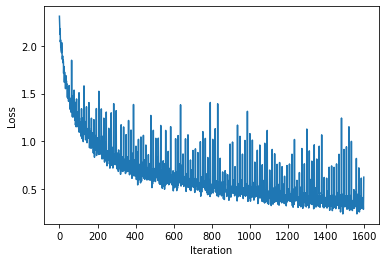

In [21]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

In [140]:
batch_size = 250
num_iters = 20000
input_dim = 28*28
num_hidden = 330
output_dim = 10

learning_rate = 0.025

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

205


In [141]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.Softmax(dim=0)
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()
 
        self.linear_out = nn.Linear(num_hidden, 10)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas

In [142]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:78
Test dataloader:20


In [143]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=340, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=340, out_features=340, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=340, out_features=340, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=340, out_features=340, bias=True)
  (relu_4): Softmax(dim=0)
  (linear_5): Linear(in_features=340, out_features=340, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=340, out_features=340, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=340, out_features=10, bias=True)
)

In [144]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [145]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 10 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 10. Loss: 2.300997734069824. Accuracy: 10.22844206626878
Iteration: 20. Loss: 2.3055310249328613. Accuracy: 9.672772175344722
Iteration: 30. Loss: 2.3004531860351562. Accuracy: 9.672772175344722
Iteration: 40. Loss: 2.293670654296875. Accuracy: 14.591479728339165
Iteration: 50. Loss: 2.2598161697387695. Accuracy: 14.982506688619058
Iteration: 60. Loss: 2.2019400596618652. Accuracy: 15.044247787610619
Iteration: 70. Loss: 2.137847900390625. Accuracy: 16.60835562873019
Epoch:  2
Iteration: 80. Loss: 2.1626009941101074. Accuracy: 21.012554023461618
Iteration: 90. Loss: 2.273488759994507. Accuracy: 18.66639226178226
Iteration: 100. Loss: 2.2151618003845215. Accuracy: 20.353982300884955
Iteration: 110. Loss: 2.132821559906006. Accuracy: 19.921794607944022
Iteration: 120. Loss: 2.1348633766174316. Accuracy: 21.38300061741099
Iteration: 130. Loss: 2.103851556777954. Accuracy: 22.103313438979214
Iteration: 140. Loss: 2.0649843215942383. Accuracy: 21.876929409343486
Iterati

Iteration: 1160. Loss: 1.3698928356170654. Accuracy: 48.898950401317144
Iteration: 1170. Loss: 1.413051724433899. Accuracy: 47.74644988680799
Epoch:  16
Iteration: 1180. Loss: 1.3922902345657349. Accuracy: 49.06359333196131
Iteration: 1190. Loss: 1.3961365222930908. Accuracy: 48.40502160938465
Iteration: 1200. Loss: 1.4424190521240234. Accuracy: 48.7548878370035
Iteration: 1210. Loss: 1.462703824043274. Accuracy: 48.50792344103725
Iteration: 1220. Loss: 1.3652669191360474. Accuracy: 48.59024490635933
Iteration: 1230. Loss: 1.5731021165847778. Accuracy: 48.40502160938465
Iteration: 1240. Loss: 1.3780897855758667. Accuracy: 49.04301296563079
Epoch:  17
Iteration: 1250. Loss: 1.3726791143417358. Accuracy: 48.63140563902037
Iteration: 1260. Loss: 1.3246283531188965. Accuracy: 49.639843589215886
Iteration: 1270. Loss: 1.3487186431884766. Accuracy: 48.878370034986624
Iteration: 1280. Loss: 1.3764369487762451. Accuracy: 48.281539411401525
Iteration: 1290. Loss: 1.3335509300231934. Accuracy: 4

Iteration: 2300. Loss: 1.0498608350753784. Accuracy: 57.04877546820333
Iteration: 2310. Loss: 0.9278580546379089. Accuracy: 56.32846264663511
Iteration: 2320. Loss: 1.1637247800827026. Accuracy: 56.122658983329906
Iteration: 2330. Loss: 1.0332518815994263. Accuracy: 56.92529327022021
Iteration: 2340. Loss: 1.1745789051055908. Accuracy: 57.76908828977156
Epoch:  31
Iteration: 2350. Loss: 1.0896942615509033. Accuracy: 56.88413253755917
Iteration: 2360. Loss: 0.968345582485199. Accuracy: 57.336900596830624
Iteration: 2370. Loss: 1.15581214427948. Accuracy: 56.88413253755917
Iteration: 2380. Loss: 1.053167462348938. Accuracy: 57.62502572545791
Iteration: 2390. Loss: 0.9710516333580017. Accuracy: 58.11895451739041
Iteration: 2400. Loss: 1.144068717956543. Accuracy: 57.17225766618646
Iteration: 2410. Loss: 0.9665423631668091. Accuracy: 57.995472319407284
Epoch:  32
Iteration: 2420. Loss: 1.046118974685669. Accuracy: 56.36962337929615
Iteration: 2430. Loss: 1.0915446281433105. Accuracy: 56.06

Epoch:  45
Iteration: 3440. Loss: 0.9113947153091431. Accuracy: 65.48672566371681
Iteration: 3450. Loss: 0.8254045844078064. Accuracy: 64.93105577279276
Iteration: 3460. Loss: 0.7266813516616821. Accuracy: 64.60176991150442
Iteration: 3470. Loss: 0.8164031505584717. Accuracy: 64.29306441654661
Iteration: 3480. Loss: 0.9176157712936401. Accuracy: 64.66351101049598
Iteration: 3490. Loss: 0.8529603481292725. Accuracy: 65.0751183371064
Iteration: 3500. Loss: 0.8821334838867188. Accuracy: 65.0751183371064
Iteration: 3510. Loss: 1.0280146598815918. Accuracy: 64.3753858818687
Epoch:  46
Iteration: 3520. Loss: 0.9542189240455627. Accuracy: 65.40440419839473
Iteration: 3530. Loss: 0.7185377478599548. Accuracy: 65.87775262399671
Iteration: 3540. Loss: 0.8347190022468567. Accuracy: 65.15743980242848
Iteration: 3550. Loss: 0.7012073397636414. Accuracy: 65.85717225766619
Iteration: 3560. Loss: 0.8438834547996521. Accuracy: 64.62235027783494
Iteration: 3570. Loss: 0.9531105756759644. Accuracy: 66.24

Iteration: 4580. Loss: 0.6417157053947449. Accuracy: 68.656102078617
Iteration: 4590. Loss: 0.6542680263519287. Accuracy: 69.66454002881251
Iteration: 4600. Loss: 0.7830401659011841. Accuracy: 69.23235233587158
Epoch:  60
Iteration: 4610. Loss: 0.5671398639678955. Accuracy: 69.23235233587158
Iteration: 4620. Loss: 0.7284606099128723. Accuracy: 69.80860259312615
Iteration: 4630. Loss: 0.5655337572097778. Accuracy: 68.88248610825272
Iteration: 4640. Loss: 0.79538893699646. Accuracy: 70.03498662276189
Iteration: 4650. Loss: 0.5634211897850037. Accuracy: 69.54105783082939
Iteration: 4660. Loss: 0.5811803936958313. Accuracy: 70.38485285038074
Iteration: 4670. Loss: 0.5637202262878418. Accuracy: 69.66454002881251
Iteration: 4680. Loss: 0.769558310508728. Accuracy: 70.09672772175345
Epoch:  61
Iteration: 4690. Loss: 0.6775792837142944. Accuracy: 70.03498662276189
Iteration: 4700. Loss: 0.7010868787765503. Accuracy: 69.49989709816835
Iteration: 4710. Loss: 0.5987759232521057. Accuracy: 69.2529

Iteration: 5720. Loss: 0.6978082656860352. Accuracy: 71.96954105783082
Iteration: 5730. Loss: 0.46556925773620605. Accuracy: 72.11360362214448
Iteration: 5740. Loss: 0.5855373740196228. Accuracy: 72.07244288948343
Iteration: 5750. Loss: 0.5127472877502441. Accuracy: 71.29038896892365
Iteration: 5760. Loss: 0.5097877979278564. Accuracy: 72.50463058242437
Iteration: 5770. Loss: 0.4993308484554291. Accuracy: 71.59909446388146
Epoch:  75
Iteration: 5780. Loss: 0.6156001687049866. Accuracy: 71.59909446388146
Iteration: 5790. Loss: 0.5323359966278076. Accuracy: 73.30726486931468
Iteration: 5800. Loss: 0.5048936009407043. Accuracy: 72.60753241407697
Iteration: 5810. Loss: 0.5094736218452454. Accuracy: 72.81333607738217
Iteration: 5820. Loss: 0.550277590751648. Accuracy: 72.58695204774645
Iteration: 5830. Loss: 0.4278395473957062. Accuracy: 72.21650545379708
Iteration: 5840. Loss: 0.44168367981910706. Accuracy: 72.0518625231529
Iteration: 5850. Loss: 0.7367560267448425. Accuracy: 72.6692735130

Iteration: 6860. Loss: 0.39097875356674194. Accuracy: 73.636550730603
Epoch:  89
Iteration: 6870. Loss: 0.46029990911483765. Accuracy: 74.06873842354393
Iteration: 6880. Loss: 0.4056778848171234. Accuracy: 74.9331138094258
Iteration: 6890. Loss: 0.48813825845718384. Accuracy: 74.48034575015436
Iteration: 6900. Loss: 0.4510781764984131. Accuracy: 74.15105988886602
Iteration: 6910. Loss: 0.44853490591049194. Accuracy: 74.29512245317967
Iteration: 6920. Loss: 0.4017734229564667. Accuracy: 74.29512245317967
Iteration: 6930. Loss: 0.3936830461025238. Accuracy: 73.636550730603
Iteration: 6940. Loss: 0.47149917483329773. Accuracy: 73.65713109693353
Epoch:  90
Iteration: 6950. Loss: 0.36934855580329895. Accuracy: 74.29512245317967
Iteration: 6960. Loss: 0.4813442826271057. Accuracy: 73.61597036427248
Iteration: 6970. Loss: 0.4904840290546417. Accuracy: 74.5215064828154
Iteration: 6980. Loss: 0.41343119740486145. Accuracy: 73.76003292858613
Iteration: 6990. Loss: 0.33081865310668945. Accuracy: 

Iteration: 7990. Loss: 0.43509775400161743. Accuracy: 75.20065857172257
Iteration: 8000. Loss: 0.3375306725502014. Accuracy: 75.11833710640049
Iteration: 8010. Loss: 0.37604305148124695. Accuracy: 74.66556904712904
Iteration: 8020. Loss: 0.34562191367149353. Accuracy: 74.7273101461206
Iteration: 8030. Loss: 0.4275910258293152. Accuracy: 75.15949783906153
Epoch:  104
Iteration: 8040. Loss: 0.29124295711517334. Accuracy: 74.3157028195102
Iteration: 8050. Loss: 0.38973313570022583. Accuracy: 74.7273101461206
Iteration: 8060. Loss: 0.38818520307540894. Accuracy: 75.01543527474789
Iteration: 8070. Loss: 0.4208264946937561. Accuracy: 74.5215064828154
Iteration: 8080. Loss: 0.3498830497264862. Accuracy: 74.45976538382384
Iteration: 8090. Loss: 0.3981860876083374. Accuracy: 74.64498868079852
Iteration: 8100. Loss: 0.3951103687286377. Accuracy: 74.35686355217123
Iteration: 8110. Loss: 0.3784392178058624. Accuracy: 74.56266721547644
Epoch:  105
Iteration: 8120. Loss: 0.4474948048591614. Accuracy

Iteration: 9120. Loss: 0.3257094919681549. Accuracy: 76.31199835357069
Epoch:  118
Iteration: 9130. Loss: 0.28887227177619934. Accuracy: 76.27083762090965
Iteration: 9140. Loss: 0.4152153730392456. Accuracy: 75.42704260135831
Iteration: 9150. Loss: 0.35553476214408875. Accuracy: 76.18851615558756
Iteration: 9160. Loss: 0.33046597242355347. Accuracy: 75.57110516567195
Iteration: 9170. Loss: 0.32196885347366333. Accuracy: 76.66186458118955
Iteration: 9180. Loss: 0.3656982481479645. Accuracy: 75.83864992796872
Iteration: 9190. Loss: 0.3408452868461609. Accuracy: 75.75632846264664
Iteration: 9200. Loss: 0.32341858744621277. Accuracy: 75.85923029429924
Epoch:  119
Iteration: 9210. Loss: 0.2510550022125244. Accuracy: 76.92940934348631
Iteration: 9220. Loss: 0.36583906412124634. Accuracy: 76.10619469026548
Iteration: 9230. Loss: 0.2895762026309967. Accuracy: 75.7151677299856
Iteration: 9240. Loss: 0.3305235207080841. Accuracy: 75.42704260135831
Iteration: 9250. Loss: 0.19376499950885773. Accu

Iteration: 10240. Loss: 0.2848186194896698. Accuracy: 75.79748919530768
Iteration: 10250. Loss: 0.204567551612854. Accuracy: 76.10619469026548
Iteration: 10260. Loss: 0.19988416135311127. Accuracy: 76.20909652191808
Iteration: 10270. Loss: 0.24490205943584442. Accuracy: 76.5178020168759
Iteration: 10280. Loss: 0.2546095848083496. Accuracy: 76.29141798724017
Iteration: 10290. Loss: 0.27695202827453613. Accuracy: 76.97057007614735
Epoch:  133
Iteration: 10300. Loss: 0.20409250259399414. Accuracy: 77.05289154146944
Iteration: 10310. Loss: 0.32794225215911865. Accuracy: 76.66186458118955
Iteration: 10320. Loss: 0.1945357322692871. Accuracy: 77.0117308088084
Iteration: 10330. Loss: 0.33703914284706116. Accuracy: 77.114632640461
Iteration: 10340. Loss: 0.2866426408290863. Accuracy: 76.16793578925704
Iteration: 10350. Loss: 0.24333015084266663. Accuracy: 76.4149001852233
Iteration: 10360. Loss: 0.24525147676467896. Accuracy: 76.88824861082527
Iteration: 10370. Loss: 0.24871423840522766. Accur

Iteration: 11350. Loss: 0.24806606769561768. Accuracy: 75.77690882897716
Iteration: 11360. Loss: 0.2425200194120407. Accuracy: 76.47664128421486
Iteration: 11370. Loss: 0.2205439954996109. Accuracy: 76.43548055155382
Iteration: 11380. Loss: 0.2148841768503189. Accuracy: 77.34101667009672
Epoch:  147
Iteration: 11390. Loss: 0.19040828943252563. Accuracy: 76.68244494752007
Iteration: 11400. Loss: 0.2027454823255539. Accuracy: 76.86766824449475
Iteration: 11410. Loss: 0.162538081407547. Accuracy: 77.93784729368183
Iteration: 11420. Loss: 0.2300574779510498. Accuracy: 76.80592714550319
Iteration: 11430. Loss: 0.3348125219345093. Accuracy: 76.92940934348631
Iteration: 11440. Loss: 0.23964852094650269. Accuracy: 76.82650751183371
Iteration: 11450. Loss: 0.25425729155540466. Accuracy: 77.27927557110516
Iteration: 11460. Loss: 0.21185526251792908. Accuracy: 77.29985593743568
Epoch:  148
Iteration: 11470. Loss: 0.22225059568881989. Accuracy: 77.3204363037662
Iteration: 11480. Loss: 0.2020371109

Iteration: 12460. Loss: 0.2413882464170456. Accuracy: 77.52623996707142
Iteration: 12470. Loss: 0.173390194773674. Accuracy: 77.3204363037662
Iteration: 12480. Loss: 0.32546430826187134. Accuracy: 76.99115044247787
Epoch:  161
Iteration: 12490. Loss: 0.17961479723453522. Accuracy: 77.67030253138506
Iteration: 12500. Loss: 0.1280474066734314. Accuracy: 78.06132949166495
Iteration: 12510. Loss: 0.2586839497089386. Accuracy: 77.48507923441038
Iteration: 12520. Loss: 0.24412751197814941. Accuracy: 77.114632640461
Iteration: 12530. Loss: 0.1718389242887497. Accuracy: 77.03231117513891
Iteration: 12540. Loss: 0.18128959834575653. Accuracy: 77.89668656102079
Iteration: 12550. Loss: 0.21386072039604187. Accuracy: 77.99958839267339
Epoch:  162
Iteration: 12560. Loss: 0.16391783952713013. Accuracy: 77.89668656102079
Iteration: 12570. Loss: 0.22218570113182068. Accuracy: 77.58798106606298
Iteration: 12580. Loss: 0.20474541187286377. Accuracy: 78.16423132331755
Iteration: 12590. Loss: 0.1651460379

Iteration: 13570. Loss: 0.13692940771579742. Accuracy: 77.85552582835975
Epoch:  175
Iteration: 13580. Loss: 0.12592022120952606. Accuracy: 77.6085614323935
Iteration: 13590. Loss: 0.16558058559894562. Accuracy: 77.58798106606298
Iteration: 13600. Loss: 0.12288334965705872. Accuracy: 77.83494546202922
Iteration: 13610. Loss: 0.12660662829875946. Accuracy: 77.8143650956987
Iteration: 13620. Loss: 0.18778230249881744. Accuracy: 76.99115044247787
Iteration: 13630. Loss: 0.20499148964881897. Accuracy: 76.88824861082527
Iteration: 13640. Loss: 0.16738754510879517. Accuracy: 77.75262399670714
Iteration: 13650. Loss: 0.15791305899620056. Accuracy: 77.73204363037662
Epoch:  176
Iteration: 13660. Loss: 0.17090797424316406. Accuracy: 77.15579337312204
Iteration: 13670. Loss: 0.16321124136447906. Accuracy: 77.87610619469027
Iteration: 13680. Loss: 0.18096686899662018. Accuracy: 78.4111957192838
Iteration: 13690. Loss: 0.14210525155067444. Accuracy: 77.54682033340194
Iteration: 13700. Loss: 0.2503

Iteration: 14680. Loss: 0.0913722887635231. Accuracy: 77.23811483844412
Iteration: 14690. Loss: 0.10950259119272232. Accuracy: 77.87610619469027
Iteration: 14700. Loss: 0.13793876767158508. Accuracy: 77.54682033340194
Iteration: 14710. Loss: 0.11274032294750214. Accuracy: 77.73204363037662
Iteration: 14720. Loss: 0.12669123709201813. Accuracy: 77.3204363037662
Iteration: 14730. Loss: 0.1360563039779663. Accuracy: 77.46449886807986
Iteration: 14740. Loss: 0.13224276900291443. Accuracy: 77.27927557110516
Epoch:  190
Iteration: 14750. Loss: 0.17368340492248535. Accuracy: 77.5056596007409
Iteration: 14760. Loss: 0.12669982016086578. Accuracy: 77.48507923441038
Iteration: 14770. Loss: 0.10398650914430618. Accuracy: 77.3204363037662
Iteration: 14780. Loss: 0.17362277209758759. Accuracy: 78.18481168964807
Iteration: 14790. Loss: 0.15534530580043793. Accuracy: 78.22597242230911
Iteration: 14800. Loss: 0.19816872477531433. Accuracy: 77.54682033340194
Iteration: 14810. Loss: 0.1572505086660385. 

Iteration: 15790. Loss: 0.21455812454223633. Accuracy: 77.75262399670714
Iteration: 15800. Loss: 0.09796582162380219. Accuracy: 78.16423132331755
Iteration: 15810. Loss: 0.1284082978963852. Accuracy: 77.83494546202922
Iteration: 15820. Loss: 0.14062021672725677. Accuracy: 77.52623996707142
Iteration: 15830. Loss: 0.13299186527729034. Accuracy: 77.46449886807986
Epoch:  204
Iteration: 15840. Loss: 0.12333743274211884. Accuracy: 77.77320436303766
Iteration: 15850. Loss: 0.10556431114673615. Accuracy: 77.6085614323935
Iteration: 15860. Loss: 0.11584071069955826. Accuracy: 77.29985593743568
Iteration: 15870. Loss: 0.1359027773141861. Accuracy: 77.7114632640461
Iteration: 15880. Loss: 0.14230260252952576. Accuracy: 76.6207038485285
Iteration: 15890. Loss: 0.14525865018367767. Accuracy: 77.67030253138506
Iteration: 15900. Loss: 0.12052303552627563. Accuracy: 77.83494546202922
Iteration: 15910. Loss: 0.1640075445175171. Accuracy: 77.36159703642724
Epoch:  205
Iteration: 15920. Loss: 0.1373033

In [17]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.Softmax(dim=0)
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas

In [19]:
batch_size = 250
num_iters = 20000
input_dim = 28*28
num_hidden = 330
output_dim = 10

learning_rate = 0.025

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

205


In [20]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:78
Test dataloader:20


In [21]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=330, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=330, out_features=330, bias=True)
  (relu_2): Softmax(dim=0)
  (linear_3): Linear(in_features=330, out_features=330, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=330, out_features=330, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=330, out_features=330, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=330, out_features=330, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=330, out_features=10, bias=True)
)

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [23]:
iteration_loss1 = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 10 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss1.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 10. Loss: 2.300269842147827. Accuracy: 9.755093640666804
Iteration: 20. Loss: 2.268422842025757. Accuracy: 13.644782877135214
Iteration: 30. Loss: 2.2179200649261475. Accuracy: 15.147149619263223
Iteration: 40. Loss: 2.2251758575439453. Accuracy: 12.574603827948138
Iteration: 50. Loss: 2.2258541584014893. Accuracy: 14.509158263017081
Iteration: 60. Loss: 2.174614667892456. Accuracy: 17.966659806544556
Iteration: 70. Loss: 2.1484668254852295. Accuracy: 15.599917678534679
Epoch:  2
Iteration: 80. Loss: 2.201634168624878. Accuracy: 17.781436509569872
Iteration: 90. Loss: 2.133601188659668. Accuracy: 17.12286478699321
Iteration: 100. Loss: 2.114102602005005. Accuracy: 17.678534677917266
Iteration: 110. Loss: 2.1581265926361084. Accuracy: 19.160321053714757
Iteration: 120. Loss: 2.0766170024871826. Accuracy: 21.36242025108047
Iteration: 130. Loss: 2.020855188369751. Accuracy: 21.465322082733074
Iteration: 140. Loss: 2.0635812282562256. Accuracy: 22.2885367359539
Iterati

Iteration: 1160. Loss: 2.1097445487976074. Accuracy: 20.909652191809013
Iteration: 1170. Loss: 2.0135200023651123. Accuracy: 20.74500926116485
Epoch:  16
Iteration: 1180. Loss: 2.100720167160034. Accuracy: 21.856349043012965
Iteration: 1190. Loss: 2.0435452461242676. Accuracy: 21.609384647046717
Iteration: 1200. Loss: 2.086543560028076. Accuracy: 20.600946696851203
Iteration: 1210. Loss: 2.1061642169952393. Accuracy: 21.012554023461618
Iteration: 1220. Loss: 2.0520739555358887. Accuracy: 20.621527063181723
Iteration: 1230. Loss: 2.1405558586120605. Accuracy: 20.76558962749537
Iteration: 1240. Loss: 2.199652671813965. Accuracy: 21.05371475612266
Epoch:  17
Iteration: 1250. Loss: 2.1322741508483887. Accuracy: 20.662687795842768
Iteration: 1260. Loss: 2.1177456378936768. Accuracy: 20.86849145914797
Iteration: 1270. Loss: 2.146432876586914. Accuracy: 20.889071825478492
Iteration: 1280. Loss: 2.2417538166046143. Accuracy: 20.72442889483433
Iteration: 1290. Loss: 2.0585317611694336. Accuracy

Iteration: 2300. Loss: 2.1113789081573486. Accuracy: 20.374562667215475
Iteration: 2310. Loss: 2.0937485694885254. Accuracy: 20.909652191809013
Iteration: 2320. Loss: 2.2059364318847656. Accuracy: 20.004116073266104
Iteration: 2330. Loss: 2.098573684692383. Accuracy: 21.07429512245318
Iteration: 2340. Loss: 2.0547962188720703. Accuracy: 21.07429512245318
Epoch:  31
Iteration: 2350. Loss: 2.065044641494751. Accuracy: 20.14817863757975
Iteration: 2360. Loss: 2.0674219131469727. Accuracy: 20.230500102901832
Iteration: 2370. Loss: 2.0908827781677246. Accuracy: 20.78616999382589
Iteration: 2380. Loss: 2.077765464782715. Accuracy: 19.07799958839267
Iteration: 2390. Loss: 2.148162364959717. Accuracy: 19.469026548672566
Iteration: 2400. Loss: 2.059203863143921. Accuracy: 19.695410578308294
Iteration: 2410. Loss: 2.078510046005249. Accuracy: 20.4980448651986
Epoch:  32
Iteration: 2420. Loss: 2.0146729946136475. Accuracy: 20.024696439596624
Iteration: 2430. Loss: 2.0866730213165283. Accuracy: 19

Epoch:  45
Iteration: 3440. Loss: 2.052098035812378. Accuracy: 20.971393290800577
Iteration: 3450. Loss: 2.0808310508728027. Accuracy: 20.41572339987652
Iteration: 3460. Loss: 2.104686975479126. Accuracy: 20.127598271249227
Iteration: 3470. Loss: 2.0558509826660156. Accuracy: 20.292241201893393
Iteration: 3480. Loss: 2.089967966079712. Accuracy: 20.374562667215475
Iteration: 3490. Loss: 2.134585380554199. Accuracy: 20.47746449886808
Iteration: 3500. Loss: 2.001024007797241. Accuracy: 19.160321053714757
Iteration: 3510. Loss: 2.0582339763641357. Accuracy: 20.642107429512244
Epoch:  46
Iteration: 3520. Loss: 2.048985242843628. Accuracy: 20.353982300884955
Iteration: 3530. Loss: 2.091308116912842. Accuracy: 20.909652191809013
Iteration: 3540. Loss: 2.134420871734619. Accuracy: 20.72442889483433
Iteration: 3550. Loss: 2.0692057609558105. Accuracy: 20.41572339987652
Iteration: 3560. Loss: 2.135984420776367. Accuracy: 19.962955340605063
Iteration: 3570. Loss: 2.066547155380249. Accuracy: 20.

Iteration: 4570. Loss: 2.1350631713867188. Accuracy: 21.609384647046717
Iteration: 4580. Loss: 2.0629076957702637. Accuracy: 21.465322082733074
Iteration: 4590. Loss: 2.055434226989746. Accuracy: 20.51862523152912
Iteration: 4600. Loss: 2.06595778465271. Accuracy: 20.086437538588186
Epoch:  60
Iteration: 4610. Loss: 2.0757665634155273. Accuracy: 20.51862523152912
Iteration: 4620. Loss: 2.133754253387451. Accuracy: 20.80675036015641
Iteration: 4630. Loss: 2.0404908657073975. Accuracy: 20.76558962749537
Iteration: 4640. Loss: 2.1168875694274902. Accuracy: 20.374562667215475
Iteration: 4650. Loss: 2.084959030151367. Accuracy: 20.395143033546
Iteration: 4660. Loss: 2.0783045291900635. Accuracy: 20.600946696851203
Iteration: 4670. Loss: 2.0678653717041016. Accuracy: 20.559785964190162
Iteration: 4680. Loss: 2.138256311416626. Accuracy: 20.41572339987652
Epoch:  61
Iteration: 4690. Loss: 2.0734174251556396. Accuracy: 21.07429512245318
Iteration: 4700. Loss: 2.0335118770599365. Accuracy: 20.7

Epoch:  74
Iteration: 5700. Loss: 2.1111977100372314. Accuracy: 18.810454826095903
Iteration: 5710. Loss: 2.0711941719055176. Accuracy: 19.674830211977774
Iteration: 5720. Loss: 2.0558207035064697. Accuracy: 19.901214241613502
Iteration: 5730. Loss: 2.1123528480529785. Accuracy: 19.962955340605063
Iteration: 5740. Loss: 2.0545623302459717. Accuracy: 18.93393702407903
Iteration: 5750. Loss: 2.0766618251800537. Accuracy: 20.004116073266104
Iteration: 5760. Loss: 2.0705490112304688. Accuracy: 18.99567812307059
Iteration: 5770. Loss: 2.146219253540039. Accuracy: 20.395143033546
Epoch:  75
Iteration: 5780. Loss: 2.038382053375244. Accuracy: 19.139740687384236
Iteration: 5790. Loss: 2.118889808654785. Accuracy: 20.024696439596624
Iteration: 5800. Loss: 2.0731942653656006. Accuracy: 20.47746449886808
Iteration: 5810. Loss: 2.1422810554504395. Accuracy: 19.654249845647254
Iteration: 5820. Loss: 2.138732433319092. Accuracy: 20.045276805927145
Iteration: 5830. Loss: 2.0932552814483643. Accuracy:

Iteration: 6830. Loss: 2.0794148445129395. Accuracy: 20.107017904918706
Iteration: 6840. Loss: 2.0798757076263428. Accuracy: 19.983535706935584
Iteration: 6850. Loss: 2.1014084815979004. Accuracy: 20.580366330520683
Iteration: 6860. Loss: 2.1061298847198486. Accuracy: 20.4980448651986
Epoch:  89
Iteration: 6870. Loss: 2.020493507385254. Accuracy: 19.777732043630376
Iteration: 6880. Loss: 2.15134334564209. Accuracy: 19.777732043630376
Iteration: 6890. Loss: 2.0714004039764404. Accuracy: 20.312821568223914
Iteration: 6900. Loss: 2.0867667198181152. Accuracy: 19.818892776291417
Iteration: 6910. Loss: 2.0026025772094727. Accuracy: 19.983535706935584
Iteration: 6920. Loss: 1.9870595932006836. Accuracy: 20.621527063181723
Iteration: 6930. Loss: 2.133812665939331. Accuracy: 20.580366330520683
Iteration: 6940. Loss: 2.123732089996338. Accuracy: 20.230500102901832
Epoch:  90
Iteration: 6950. Loss: 2.028122663497925. Accuracy: 20.580366330520683
Iteration: 6960. Loss: 2.0598180294036865. Accurac

Epoch:  103
Iteration: 7960. Loss: 2.120312452316284. Accuracy: 19.32496398435892
Iteration: 7970. Loss: 2.0377860069274902. Accuracy: 19.489606915003087
Iteration: 7980. Loss: 2.0810282230377197. Accuracy: 20.600946696851203
Iteration: 7990. Loss: 2.058884859085083. Accuracy: 20.16875900391027
Iteration: 8000. Loss: 2.09651255607605. Accuracy: 20.559785964190162
Iteration: 8010. Loss: 2.087402105331421. Accuracy: 20.20991973657131
Iteration: 8020. Loss: 2.0598366260528564. Accuracy: 20.82733072648693
Iteration: 8030. Loss: 2.085491895675659. Accuracy: 19.839473142621937
Epoch:  104
Iteration: 8040. Loss: 2.1330771446228027. Accuracy: 20.333401934554434
Iteration: 8050. Loss: 1.9752509593963623. Accuracy: 20.559785964190162
Iteration: 8060. Loss: 2.0851383209228516. Accuracy: 21.03313438979214
Iteration: 8070. Loss: 2.0765011310577393. Accuracy: 20.78616999382589
Iteration: 8080. Loss: 2.05792498588562. Accuracy: 20.84791109281745
Iteration: 8090. Loss: 2.0673277378082275. Accuracy: 20

Iteration: 9090. Loss: 2.0660505294799805. Accuracy: 21.341839884749948
Iteration: 9100. Loss: 2.1207644939422607. Accuracy: 21.17719695410578
Iteration: 9110. Loss: 2.1041343212127686. Accuracy: 21.11545585511422
Iteration: 9120. Loss: 2.0800371170043945. Accuracy: 20.950812924470057
Epoch:  118
Iteration: 9130. Loss: 2.0564804077148438. Accuracy: 21.13603622144474
Iteration: 9140. Loss: 2.0975260734558105. Accuracy: 21.897509775674006
Iteration: 9150. Loss: 2.062699556350708. Accuracy: 20.889071825478492
Iteration: 9160. Loss: 2.03029465675354. Accuracy: 21.07429512245318
Iteration: 9170. Loss: 2.064419984817505. Accuracy: 21.485902449063595
Iteration: 9180. Loss: 2.0729572772979736. Accuracy: 21.794607944021404
Iteration: 9190. Loss: 2.00508713722229. Accuracy: 20.971393290800577
Iteration: 9200. Loss: 2.11482310295105. Accuracy: 20.950812924470057
Epoch:  119
Iteration: 9210. Loss: 2.038890838623047. Accuracy: 21.13603622144474
Iteration: 9220. Loss: 2.083251476287842. Accuracy: 20

Epoch:  132
Iteration: 10220. Loss: 2.019340753555298. Accuracy: 21.67112574603828
Iteration: 10230. Loss: 2.0262038707733154. Accuracy: 21.218357686766826
Iteration: 10240. Loss: 2.0502774715423584. Accuracy: 21.38300061741099
Iteration: 10250. Loss: 1.9752607345581055. Accuracy: 21.568223914385676
Iteration: 10260. Loss: 2.0956978797912598. Accuracy: 20.971393290800577
Iteration: 10270. Loss: 1.9817239046096802. Accuracy: 20.559785964190162
Iteration: 10280. Loss: 2.0496933460235596. Accuracy: 20.580366330520683
Iteration: 10290. Loss: 1.9664353132247925. Accuracy: 20.72442889483433
Epoch:  133
Iteration: 10300. Loss: 2.053462028503418. Accuracy: 21.238938053097346
Iteration: 10310. Loss: 2.099984884262085. Accuracy: 21.0948754887837
Iteration: 10320. Loss: 2.0155279636383057. Accuracy: 20.86849145914797
Iteration: 10330. Loss: 2.0433833599090576. Accuracy: 20.312821568223914
Iteration: 10340. Loss: 2.1596920490264893. Accuracy: 20.80675036015641
Iteration: 10350. Loss: 2.01138496398

Iteration: 11340. Loss: 2.0518243312835693. Accuracy: 19.57192838032517
Iteration: 11350. Loss: 2.030020236968994. Accuracy: 20.930232558139537
Iteration: 11360. Loss: 2.06306529045105. Accuracy: 21.17719695410578
Iteration: 11370. Loss: 2.069193124771118. Accuracy: 20.065857172257665
Iteration: 11380. Loss: 2.0450263023376465. Accuracy: 20.70384852850381
Epoch:  147
Iteration: 11390. Loss: 2.0596086978912354. Accuracy: 20.271660835562873
Iteration: 11400. Loss: 2.0691561698913574. Accuracy: 20.642107429512244
Iteration: 11410. Loss: 2.1050190925598145. Accuracy: 21.03313438979214
Iteration: 11420. Loss: 2.048875570297241. Accuracy: 20.70384852850381
Iteration: 11430. Loss: 2.079634189605713. Accuracy: 20.930232558139537
Iteration: 11440. Loss: 2.0864455699920654. Accuracy: 20.086437538588186
Iteration: 11450. Loss: 2.0957133769989014. Accuracy: 20.53920559785964
Iteration: 11460. Loss: 2.0630791187286377. Accuracy: 21.44474171640255
Epoch:  148
Iteration: 11470. Loss: 2.04843020439147

Iteration: 12460. Loss: 2.1157209873199463. Accuracy: 20.16875900391027
Iteration: 12470. Loss: 2.077383518218994. Accuracy: 19.983535706935584
Iteration: 12480. Loss: 2.078815221786499. Accuracy: 21.012554023461618
Epoch:  161
Iteration: 12490. Loss: 2.0605812072753906. Accuracy: 21.07429512245318
Iteration: 12500. Loss: 2.085608720779419. Accuracy: 20.930232558139537
Iteration: 12510. Loss: 2.0195093154907227. Accuracy: 21.05371475612266
Iteration: 12520. Loss: 2.0807032585144043. Accuracy: 21.012554023461618
Iteration: 12530. Loss: 2.0596189498901367. Accuracy: 20.559785964190162
Iteration: 12540. Loss: 2.0631823539733887. Accuracy: 20.271660835562873
Iteration: 12550. Loss: 2.0341150760650635. Accuracy: 20.683268162173288
Epoch:  162
Iteration: 12560. Loss: 2.1114134788513184. Accuracy: 21.03313438979214
Iteration: 12570. Loss: 2.0529136657714844. Accuracy: 19.386705083350485
Iteration: 12580. Loss: 2.1168932914733887. Accuracy: 20.024696439596624
Iteration: 12590. Loss: 2.16746592

Epoch:  175
Iteration: 13580. Loss: 2.0857250690460205. Accuracy: 20.642107429512244
Iteration: 13590. Loss: 2.007991075515747. Accuracy: 20.51862523152912
Iteration: 13600. Loss: 2.0188980102539062. Accuracy: 19.983535706935584
Iteration: 13610. Loss: 2.0899417400360107. Accuracy: 20.74500926116485
Iteration: 13620. Loss: 2.095961093902588. Accuracy: 20.642107429512244
Iteration: 13630. Loss: 2.114492416381836. Accuracy: 20.333401934554434
Iteration: 13640. Loss: 2.0107614994049072. Accuracy: 20.065857172257665
Iteration: 13650. Loss: 2.0516960620880127. Accuracy: 20.889071825478492
Epoch:  176
Iteration: 13660. Loss: 2.022587299346924. Accuracy: 20.53920559785964
Iteration: 13670. Loss: 2.0709261894226074. Accuracy: 20.991973657131098
Iteration: 13680. Loss: 2.1374197006225586. Accuracy: 20.600946696851203
Iteration: 13690. Loss: 2.057224750518799. Accuracy: 20.107017904918706
Iteration: 13700. Loss: 2.124976634979248. Accuracy: 20.14817863757975
Iteration: 13710. Loss: 2.02133655548

Iteration: 14700. Loss: 2.081249952316284. Accuracy: 19.633669479316733
Iteration: 14710. Loss: 2.110952615737915. Accuracy: 18.97509775674007
Iteration: 14720. Loss: 2.10105299949646. Accuracy: 20.82733072648693
Iteration: 14730. Loss: 2.0844125747680664. Accuracy: 20.600946696851203
Iteration: 14740. Loss: 2.1192777156829834. Accuracy: 20.683268162173288
Epoch:  190
Iteration: 14750. Loss: 2.1030027866363525. Accuracy: 20.395143033546
Iteration: 14760. Loss: 2.120687484741211. Accuracy: 20.353982300884955
Iteration: 14770. Loss: 2.008877754211426. Accuracy: 19.839473142621937
Iteration: 14780. Loss: 2.0412380695343018. Accuracy: 20.76558962749537
Iteration: 14790. Loss: 2.099250555038452. Accuracy: 20.045276805927145
Iteration: 14800. Loss: 2.0680930614471436. Accuracy: 19.736571310969335
Iteration: 14810. Loss: 2.1021246910095215. Accuracy: 20.78616999382589
Iteration: 14820. Loss: 1.9987388849258423. Accuracy: 20.395143033546
Epoch:  191
Iteration: 14830. Loss: 2.0609846115112305. 

Iteration: 15820. Loss: 2.652163505554199. Accuracy: 20.70384852850381
Iteration: 15830. Loss: 2.0596463680267334. Accuracy: 20.4980448651986
Epoch:  204
Iteration: 15840. Loss: 2.0529074668884277. Accuracy: 20.47746449886808
Iteration: 15850. Loss: 2.0167839527130127. Accuracy: 20.70384852850381
Iteration: 15860. Loss: 2.106201171875. Accuracy: 20.024696439596624
Iteration: 15870. Loss: 2.0654795169830322. Accuracy: 20.086437538588186
Iteration: 15880. Loss: 2.101109504699707. Accuracy: 20.065857172257665
Iteration: 15890. Loss: 2.1614208221435547. Accuracy: 21.0948754887837
Iteration: 15900. Loss: 2.0471160411834717. Accuracy: 20.395143033546
Iteration: 15910. Loss: 2.062629461288452. Accuracy: 20.621527063181723
Epoch:  205
Iteration: 15920. Loss: 2.1058216094970703. Accuracy: 20.53920559785964
Iteration: 15930. Loss: 2.071117639541626. Accuracy: 20.662687795842768
Iteration: 15940. Loss: 2.1207990646362305. Accuracy: 20.251080469232352
Iteration: 15950. Loss: 2.06204891204834. Accu